<a href="https://colab.research.google.com/github/LJMfintech/Financial_Data_Analysis/blob/main/DataAnalysisHW1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install wrds
!pip install numpy_financial

In [42]:
#코드를 작성하는데 필요한 도구들 끌어오기
import wrds
import numpy_financial as npf
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [43]:
#WRDS 연결
conn = wrds.Connection()

Enter your WRDS username [root]:leeskku2025
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


# 1번 문제

In [44]:
#WRDS에 있는 리스트들 확인 -> 리스트를 확인하여 필요한 데이터가 들어있는 항목을 찾아내야됨
lib_list = conn.list_libraries()
print(type(lib_list))
print(lib_list)

<class 'list'>
['aha_sample', 'ahasamp', 'audit', 'audit_audit_comp', 'audit_common', 'auditsmp', 'auditsmp_all', 'bank', 'bank_all', 'bank_premium_samp', 'banksamp', 'block', 'block_all', 'boardex_trial', 'boardsmp', 'bvd_amadeus_trial', 'bvd_bvdbankf_trial', 'bvd_orbis_trial', 'bvdsamp', 'calcbench_trial', 'calcbnch', 'candid_samp', 'cboe', 'cboe_all', 'cboe_sample', 'cboesamp', 'cddsamp', 'ciq', 'ciq_capstrct', 'ciq_common', 'ciqsamp', 'ciqsamp_capstrct', 'ciqsamp_common', 'ciqsamp_keydev', 'ciqsamp_pplintel', 'ciqsamp_ratings', 'ciqsamp_transactions', 'ciqsamp_transcripts', 'cisdmsmp', 'columnar', 'comp', 'comp_execucomp', 'comp_global_daily', 'comp_na_daily_all', 'compsamp', 'compsamp_all', 'compsamp_snapshot', 'contrib', 'contrib_as_filed_financials', 'contrib_ceo_turnover', 'contrib_char_returns', 'contrib_corporate_culture', 'contrib_general', 'contrib_global_factor', 'contrib_intangible_value', 'contrib_kpss', 'contrib_liva', 'crsp', 'crsp_a_indexes', 'crsp_a_stock', 'crsp_a_t

In [45]:
# comp 카테고리를 선택하고 위와 마찬가지로 comp 하위 리스트들을 확인. company의 줄임말이라 대부분 회사의 정보가 여기 있을 것 같다는 추측으로 선택
conn.list_tables(library='comp')

['aco_amda',
 'aco_imda',
 'aco_indfnta',
 'aco_indfntq',
 'aco_indfntytd',
 'aco_indsta',
 'aco_indstq',
 'aco_indstytd',
 'aco_notesa',
 'aco_notesq',
 'aco_notessa',
 'aco_notesytd',
 'aco_pnfnda',
 'aco_pnfndq',
 'aco_pnfndytd',
 'aco_pnfnta',
 'aco_pnfntq',
 'aco_pnfntytd',
 'aco_transa',
 'aco_transq',
 'aco_transsa',
 'aco_transytd',
 'adsprate',
 'asec_amda',
 'asec_imda',
 'asec_notesa',
 'asec_notesq',
 'asec_transa',
 'asec_transq',
 'bank_aacctchg',
 'bank_adesind',
 'bank_afnd1',
 'bank_afnd2',
 'bank_afnddc1',
 'bank_afnddc2',
 'bank_afntind',
 'bank_funda',
 'bank_funda_fncd',
 'bank_fundq',
 'bank_fundq_fncd',
 'bank_iacctchg',
 'bank_idesind',
 'bank_ifndq',
 'bank_ifndytd',
 'bank_ifntq',
 'bank_ifntytd',
 'bank_names',
 'bank_namesq',
 'chars',
 'co_aacctchg',
 'co_aaudit',
 'co_acthist',
 'co_adesind',
 'co_adjfact',
 'co_afnd1',
 'co_afnd2',
 'co_afnddc1',
 'co_afnddc2',
 'co_afntind1',
 'co_afntind2',
 'co_ainvval',
 'co_amkt',
 'co_busdescl',
 'co_cotype',
 'co_f

In [46]:
# comp 하위 리스트중 g_secm에서 이후의 문제들을 해결할 때 필요한 변수들을 가장 많이 포함하고 있다고 생각해 현재는 g_secm 테이블로 데이터 추출 진행중
# g_secm = "Global Sector Company Master" 테이블을 의미합니다. 이 테이블은 각 기업의 국가, 섹터, 산업 등 국가별·섹터별 특성을 정의 (출차: 챗지피)
country = conn.get_table(library='comp', table='g_funda', obs = 5)
country

,gvkey,indfmt,datafmt,consol,popsrc,acctstd,acqmeth,bspr,compst,curcd,...,tstkni,conm,costat,fic,loc,naicsh,sich,rank,au,auop
0,001166,INDL,HIST_STD,C,I,DS,<NA>,GO,<NA>,NLG,...,0.0,ASM INTERNATIONAL NV,A,NLD,NLD,333295,3559,1,5,1
1,001166,INDL,HIST_STD,C,I,DS,<NA>,GO,<NA>,NLG,...,0.0,ASM INTERNATIONAL NV,A,NLD,NLD,333295,3559,1,5,1
2,001166,INDL,HIST_STD,C,I,DS,<NA>,GO,<NA>,NLG,...,0.0,ASM INTERNATIONAL NV,A,NLD,NLD,333295,3559,1,5,1
3,001166,INDL,HIST_STD,C,I,DS,<NA>,GO,<NA>,EUR,...,0.0,ASM INTERNATIONAL NV,A,NLD,NLD,333295,3559,1,5,1
4,001166,INDL,HIST_STD,C,I,DS,<NA>,GO,<NA>,EUR,...,0.0,ASM INTERNATIONAL NV,A,NLD,NLD,333295,3559,1,5,1


In [47]:
# CSV 파일로 저장
country.to_csv('country.csv', index=False)

In [48]:
# 총 발행 주식 수 추출
cshoi_data_set = conn.raw_sql("""select gvkey, datadate, cshoi

                          from comp.g_funda
                          where fic IN('GBR', 'DEU', 'JPN', 'FRA', 'AUS', 'CHN', 'IND', 'BRA', 'ZAF', 'TUR')
                          and datadate between '2020-03-01' and '2024-12-31'
                          """)
print(cshoi_data_set.shape)

(105175, 3)


In [49]:
# 데이터 추출

month_data_set = conn.raw_sql("""select gvkey, iid, datadate, ajexm, ajpm, cshtrm, prccm, prchm, prclm, dvpspm, dvpsxm, fic, loc

                          from comp.g_secm
                          where fic IN('GBR', 'DEU', 'JPN', 'FRA', 'AUS', 'CHN', 'IND', 'BRA', 'ZAF', 'TUR')
                          and datadate between '2020-03-01' and '2024-12-31'
                          """)
print(month_data_set.shape)

(1546685, 13)


데이터 클리닝

In [50]:

# inf, -inf를 NaN으로 변환
cshoi_data_set = cshoi_data_set.replace([np.inf, -np.inf], np.nan)

# Drop the rows containing NA
cshoi_data_set= cshoi_data_set.dropna(axis=0) # NA값 있는 행 삭제

print(cshoi_data_set.shape)


# inf, -inf를 NaN으로 변환
month_data_set = month_data_set.replace([np.inf, -np.inf], np.nan)

# Drop the rows containing NA
month_data_set= month_data_set.dropna(axis=0) # NA값 있는 행 삭제

print(month_data_set.shape)


(96240, 3)
(1361150, 13)


In [51]:
print('Null Values =', cshoi_data_set.isnull().values.any())
print('Null Values =', month_data_set.isnull().values.any())

Null Values = False
Null Values = False


데이터 병합

In [52]:
import pandas as pd

# 월간 데이터의 'datadate'에서 연도 추출 후 컬럼 추가
month_data_set['year'] = pd.to_datetime(month_data_set['datadate']).dt.year

# 연간 데이터도 'datadate'의 연도 추출하여 year 컬럼 생성
cshoi_data_set['year'] = pd.to_datetime(cshoi_data_set['datadate']).dt.year

# gvkey, fic, year 세 컬럼 기준으로 병합
data_set = pd.merge(month_data_set, cshoi_data_set, on=['gvkey', 'year'], how='left')

# 필요 없는 컬럼 삭제
data_set = data_set.drop(columns=['datadate_y', 'year'])

# datadate_x 컬럼 이름을 datadate로 변경
data_set = data_set.rename(columns={'datadate_x': 'datadate'})

# 결과 확인
print(data_set.head())

    gvkey  iid    datadate  ajexm  ajpm      cshtrm   prccm   prchm   prclm  \
0  001932  01W  2020-03-31    1.0   1.0  167128.582   27.59  32.445   23.82   
1  001932  02W  2020-03-31    1.0   1.0   38145.786  598.66  645.17   498.0   
2  001932  03W  2020-03-31    1.0   1.0      57.605   30.98  37.265   25.65   
3  001932  04W  2020-03-31    1.0   1.0   23539.937  27.385   32.53  23.685   
4  002410  01W  2020-03-31    1.0   1.0  2421381.88   3.442  4.2265   2.337   

   dvpspm  dvpsxm  fic  loc      cshoi  
0     0.0   0.526  GBR  GBR   2288.191  
1     0.0  10.789  GBR  GBR   2288.191  
2     0.0   0.579  GBR  GBR   2288.191  
3     0.0   0.526  GBR  GBR   2288.191  
4   0.082     0.0  GBR  GBR  20262.135  


# 2번 문제

In [56]:

# -----------------------------
# 1. 조정계수 처리
# -----------------------------
# ajexm 처리
if 'ajexm' in data_set.columns:
    data_set['ajexm'] = data_set['ajexm'].replace(0, np.nan)
    if data_set['ajexm'].isna().any():
      data_set['ajexm'] = data_set['ajexm'].fillna(1)
else:
    data_set['ajexm'] = 1

# ajpm 처리
if 'ajpm' in data_set.columns:
    data_set['ajpm'] = data_set['ajpm'].replace(0, np.nan).fillna(1)
else:
    data_set['ajpm'] = 1

# -----------------------------
# 2. 날짜 처리 및 정렬
# -----------------------------
data_set['datadate'] = pd.to_datetime(data_set['datadate'], errors='coerce')
invalid_dates = data_set['datadate'].isna().sum()
data_set = data_set.dropna(subset=['datadate'])  # 날짜 NaT 제거
data_set = data_set.sort_values(['gvkey', 'datadate'])

# -----------------------------
# 3. 조정주가 및 수익률 계산
# -----------------------------
data_set['prccm_adj'] = data_set['prccm'] * (data_set['ajpm'] / data_set['ajexm'])
data_set['prccm_adj_prev'] = data_set.groupby('gvkey')['prccm_adj'].shift(1)
data_set['ret'] = data_set['prccm_adj'] / data_set['prccm_adj_prev'] - 1

# 수익률 이상치 필터 (절대값 1.5 초과 시 제거)
data_set.loc[data_set['ret'].abs() > 1.5, 'ret'] = np.nan

# -----------------------------
# 4. 시가총액 계산
# -----------------------------
if 'cshoi' in data_set.columns:
    data_set['mktcap'] = data_set['prccm_adj'] * data_set['cshoi']
else:
    data_set['mktcap'] = np.nan

# -----------------------------
# 5. 결측 및 이상치 처리
# -----------------------------
data_set = data_set.replace([np.inf, -np.inf], np.nan)
data_set = data_set.dropna(subset=['ret', 'mktcap', 'datadate'])

# -----------------------------
# 6. 동등가중 수익률 계산
# -----------------------------
# ret 유효값이 2개 이상인 그룹만 계산
def calc_ew_avg(x):
    valid_ret = x['ret'].dropna()
    if len(valid_ret) >= 2:
        return valid_ret.mean()
    else:
        return np.nan

ew_ret = data_set.groupby(['fic', 'datadate']).apply(calc_ew_avg).reset_index(name='ew_ret')
ew_ret = ew_ret.dropna(subset=['ew_ret'])

# -----------------------------
# 7. 시가총액가중 수익률 계산
# -----------------------------
def calc_vw_avg(x):
    valid = (x['mktcap'] > 0) & x['ret'].notna()
    if valid.any():
        return np.average(x.loc[valid, 'ret'], weights=x.loc[valid, 'mktcap'])
    else:
        return np.nan

vw_ret = data_set.groupby(['fic', 'datadate']).apply(calc_vw_avg).reset_index(name='vw_ret')
vw_ret = vw_ret.dropna(subset=['vw_ret'])

# -----------------------------
# 8. 최종 정렬 및 확인
# -----------------------------
ew_ret = ew_ret.sort_values('datadate').reset_index(drop=True)
vw_ret = vw_ret.sort_values('datadate').reset_index(drop=True)

print("동등가중 수익률 샘플:")
print(ew_ret.head())

print("시가총액가중 수익률 샘플:")
print(vw_ret.head())

/tmp/ipython-input-3737623753.py:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ew_ret = data_set.groupby(['fic', 'datadate']).apply(calc_ew_avg).reset_index(name='ew_ret')


동등가중 수익률 샘플:
   fic   datadate    ew_ret
0  AUS 2020-03-31  0.057967
1  DEU 2020-03-31  0.016689
2  FRA 2020-03-31  0.011236
3  BRA 2020-03-31 -0.203136
4  GBR 2020-03-31  0.111283
시가총액가중 수익률 샘플:
   fic   datadate    vw_ret
0  AUS 2020-03-31  0.019447
1  CHN 2020-03-31 -0.005098
2  DEU 2020-03-31  0.070884
3  FRA 2020-03-31  0.072531
4  GBR 2020-03-31  0.219043


/tmp/ipython-input-3737623753.py:74: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_ret = data_set.groupby(['fic', 'datadate']).apply(calc_vw_avg).reset_index(name='vw_ret')


In [57]:
ew_ret.groupby('fic')['ew_ret'].median()

,ew_ret
fic,
AUS,0.029222
BRA,-0.004912
CHN,-0.002799
DEU,0.005177
FRA,0.000552
GBR,0.002119
IND,0.039305
JPN,0.003996
TUR,0.034164


/tmp/ipython-input-1080829041.py:15: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1080829041.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1080829041.py:15: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1080829041.py:15: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1080829041.py:15: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning

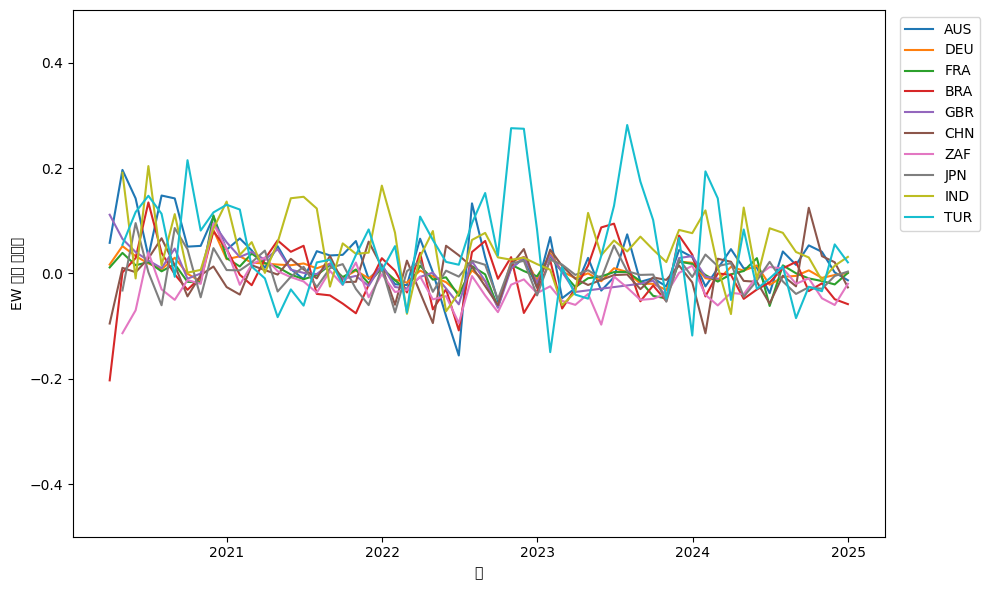

In [58]:
# datadate가 날짜형이면 변환, 아니면 생략
ew_ret['datadate'] = pd.to_datetime(ew_ret['datadate'], errors='coerce')

# 0.5 이상/이하 극단값 제외한 데이터만 선택
plot_data = ew_ret[ew_ret['ew_ret'].abs() < 0.5]

plt.figure(figsize=(10,6))
for fic in plot_data['fic'].unique():
    temp = plot_data[plot_data['fic'] == fic]
    plt.plot(temp['datadate'], temp['ew_ret'], label=fic)
plt.ylim(-0.5, 0.5)           # y축 제한 필요하면 조정(극단값이 이미 제거되어 -0.2~0.2로 주로 사용)
plt.ylabel("EW 월별 수익률")
plt.xlabel("월")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.tight_layout()
plt.show()
